# Time-Based Retail Sales Analysis

## Business Question
How do sales change over time, and what time-based patterns can help a retail business improve decision making?

## Dataset
This project analyzes transactional sales data with a focus on time-basedtrends such as daily, monthly and seasonal patterns.

## Tools Used
- Python
- Pandas
- Numpy
- Matplotlib

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use("default")

In [2]:
df = pd.read_csv("../data/retail_sales.csv")
df.head()

,Order ID,Amount,Profit,Quantity,Category,Sub-Category,PaymentMode,Order Date,CustomerName,State,City,Year-Month
0,B-26776,9726,1275,5,Electronics,Electronic Games,UPI,2023-06-27,David Padilla,Florida,Miami,2023-06
1,B-26776,9726,1275,5,Electronics,Electronic Games,UPI,2024-12-27,Connor Morgan,Illinois,Chicago,2024-12
2,B-26776,9726,1275,5,Electronics,Electronic Games,UPI,2021-07-25,Robert Stone,New York,Buffalo,2021-07
3,B-26776,4975,1330,14,Electronics,Printers,UPI,2023-06-27,David Padilla,Florida,Miami,2023-06
4,B-26776,4975,1330,14,Electronics,Printers,UPI,2024-12-27,Connor Morgan,Illinois,Chicago,2024-12


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1194 entries, 0 to 1193
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Order ID      1194 non-null   object
 1   Amount        1194 non-null   int64 
 2   Profit        1194 non-null   int64 
 3   Quantity      1194 non-null   int64 
 4   Category      1194 non-null   object
 5   Sub-Category  1194 non-null   object
 6   PaymentMode   1194 non-null   object
 7   Order Date    1194 non-null   object
 8   CustomerName  1194 non-null   object
 9   State         1194 non-null   object
 10  City          1194 non-null   object
 11  Year-Month    1194 non-null   object
dtypes: int64(3), object(9)
memory usage: 112.1+ KB


In [4]:
df.columns

Index(['Order ID', 'Amount', 'Profit', 'Quantity', 'Category', 'Sub-Category',
       'PaymentMode', 'Order Date', 'CustomerName', 'State', 'City',
       'Year-Month'],
      dtype='object')

### Initial Obsvervatons
- The dataset contains sales-related columns such as amount, city, and date.
- A date column is present and will be used for time-based analysis.
- Further cleaning may be required before analyzing trends.

In [5]:
df[["Order Date", "Year-Month"]].head(10)

,Order Date,Year-Month
0,2023-06-27,2023-06
1,2024-12-27,2024-12
2,2021-07-25,2021-07
3,2023-06-27,2023-06
4,2024-12-27,2024-12
5,2021-07-25,2021-07
6,2024-05-11,2024-05
7,2021-10-09,2021-10
8,2022-11-18,2022-11
9,2022-11-18,2022-11


In [6]:
df.dtypes

Order ID        object
Amount           int64
Profit           int64
Quantity         int64
Category        object
Sub-Category    object
PaymentMode     object
Order Date      object
CustomerName    object
State           object
City            object
Year-Month      object
dtype: object

### Date Column Assessment
- The dataset contains both a full date column (`Order Date`) and a pre-aggregated `Year-Month` column.
- `Order Date` provides more granular information and will be used as the primary time variable.
- `Year-Month` appears to be derived from `Order Date` and will be used for validation if needed.

In [7]:
df["Order Date"] = pd.to_datetime(df["Order Date"])

In [9]:
df = df.sort_values("Order Date")
df.set_index("Order Date", inplace=True)

In [10]:
df.index.min(), df.index.max()

(Timestamp('2020-03-22 00:00:00'), Timestamp('2025-03-15 00:00:00'))

### Date Conversion
- The `Order Date` column was converted from a string (`object`) to a datetime format.
- This allows pandas to perfom time-based operations such as sorting, grouping, and resampling.
- Converting dates early prevents errors in later analysis.

In [11]:
df.columns

Index(['Order ID', 'Amount', 'Profit', 'Quantity', 'Category', 'Sub-Category',
       'PaymentMode', 'CustomerName', 'State', 'City', 'Year-Month'],
      dtype='object')

In [14]:
df[["Year-Month"]].head()

,Year-Month
Order Date,
2020-03-22,2020-03
2020-03-23,2020-03
2020-03-31,2020-03
2020-03-31,2020-03
2020-04-02,2020-04


In [16]:
df["Month"] = df.index.month
df["Month"].head()

Order Date
2020-03-22    3
2020-03-23    3
2020-03-31    3
2020-03-31    3
2020-04-02    4
Name: Month, dtype: int32

In [17]:
df[["Amount", "Year-Month", "Month"]].head()

,Amount,Year-Month,Month
Order Date,,,
2020-03-22,8962,2020-03,3
2020-03-23,2975,2020-03,3
2020-03-31,2850,2020-03,3
2020-03-31,8204,2020-03,3
2020-04-02,2225,2020-04,4


In [18]:
df["DayOfWeek"] = df.index.dayofweek

In [19]:
df.head()

,Order ID,Amount,Profit,Quantity,Category,Sub-Category,PaymentMode,CustomerName,State,City,Year-Month,Month,DayOfWeek
Order Date,,,,,,,,,,,,,
2020-03-22,B-25665,8962,2444,18,Electronics,Electronic Games,Debit Card,Isabella Roach,Illinois,Peoria,2020-03,3,6
2020-03-23,B-25102,2975,462,14,Office Supplies,Pens,Credit Card,Jessica Anderson,New York,New York City,2020-03,3,0
2020-03-31,B-26523,2850,904,6,Electronics,Phones,EMI,Jasmine Delgado,Illinois,Chicago,2020-03,3,1
2020-03-31,B-26523,8204,2382,6,Office Supplies,Pens,UPI,Jasmine Delgado,Illinois,Chicago,2020-03,3,1
2020-04-02,B-26622,2225,589,7,Furniture,Sofas,Credit Card,Timothy Jensen,Florida,Orlando,2020-04,4,3


In [22]:
df["DayType"] = df["DayOfWeek"].apply(
    lambda x: "Weekend" if x >= 5 else "Weekday"
)

In [23]:
week_day_sales = (
    df.groupby("DayType")["Amount"]
    .mean()
)
week_day_sales

DayType
Weekday    5204.046857
Weekend    5106.890282
Name: Amount, dtype: float64

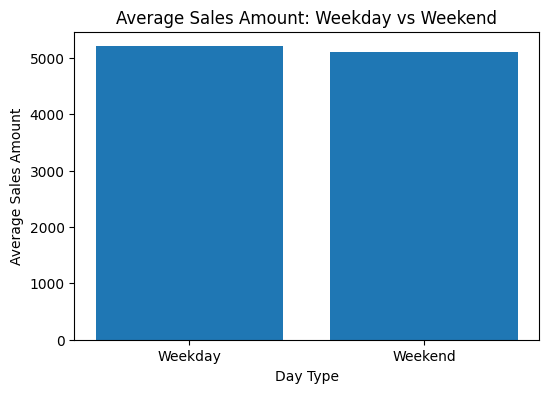

In [ ]:
plt.figure(figsize=(6, 4))

plt.bar(week_day_sales.index, week_day_sales.values)
plt.title("Average Sales Amount: Weekday vs Weekend")
plt.xlabel("Day Type")
plt.ylabel("Average Sales Amount")
plt.show()


## Conclusion

This analysis examined how time influences retail sales through both calendar structure
(monthly seasonality) and customer behavior within the week (weekday vs weekend patterns).
The results show that sales are not evenly distributed over time, highlighting opportunities
for better planning in areas such as promotions, inventory management, and staffing.

Understanding these time-based patterns allows businesses to make more informed operational
and strategic decisions using historical sales data.
